In [1]:
import numpy as np
import meshio
import pyvista as pv
import matplotlib.pyplot as plt
import sys
from scipy import special 

In [2]:
#
dt = 5e-5
dx = 0.01
nu = 3e-3

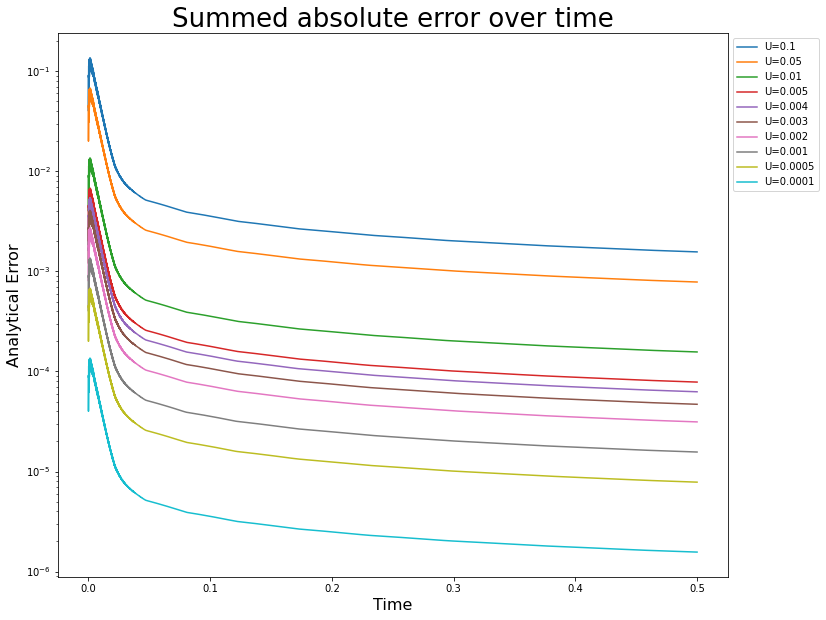

In [44]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)

file = "./0.1/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="U=0.1")
file = "./0.05/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="U=0.05")
file = "./0.01/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="U=0.01")
file = "./0.005/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="U=0.005")
file = "./0.004/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="U=0.004")
file = "./0.003/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="U=0.003")
file = "./0.002/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="U=0.002")
file = "./0.001/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="U=0.001")
file = "./0.0005/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="U=0.0005")
file = "./0.0001/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="U=0.0001")

ax.set_ylabel('Analytical Error', fontsize=16)
ax.set_xlabel('Time', fontsize=16)
ax.set_title('Summed absolute error over time', fontsize=26)
plt.legend(bbox_to_anchor=(1,1), loc="upper left");
plt.savefig("AbsErrorOverTimeDepU.png")

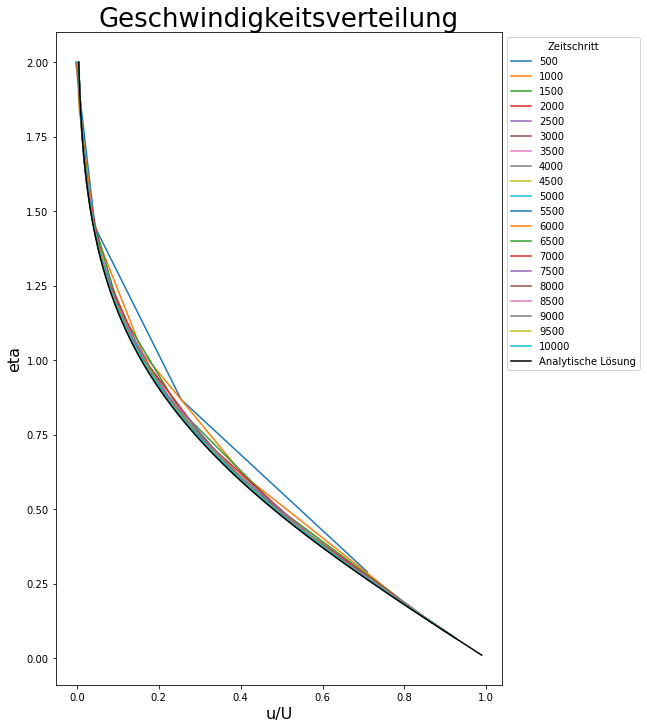

In [4]:
# Listauswertung
UList = np.array([0.1,0.05,0.01,0.005,0.004,0.003,0.002,0.001,0.0005,0.0001])
y = np.linspace(0.005,0.01*200,200)

def plot(filename):
    mesh = pv.read(file)
    eta = y / (2 * np.sqrt(nu * t))
    xVel = np.reshape(np.array(mesh.point_arrays["velocity"]),(202,52,3))[:,:,0]
    xVel /= U
    ax.plot(xVel[1:-1,25],np.clip(eta,0,2),label=u)

fig,ax = plt.subplots(1,1,figsize=(8,12))
ax.set_xlabel('u/U', fontsize=16)
ax.set_ylabel('eta', fontsize=16)
ax.set_title('Geschwindigkeitsverteilung', fontsize=26)
for i in range(1,21):
    U = UList[5]
    u = 500 * i
    t = u * dt
    file = "./" + str(U) + "/results" + str(u) + ".vtk"
    plot(file)
eta = np.linspace(0.01,2,1000)
xVel = (1 - special.erf(eta)) 
plt.plot(xVel,eta,c='black',label='Analytische Lösung')
plt.legend(bbox_to_anchor=(1,1), loc="upper left",title='Zeitschritt')
plt.savefig("0.003Verteilungsfunktion.png",bbox_inches='tight')

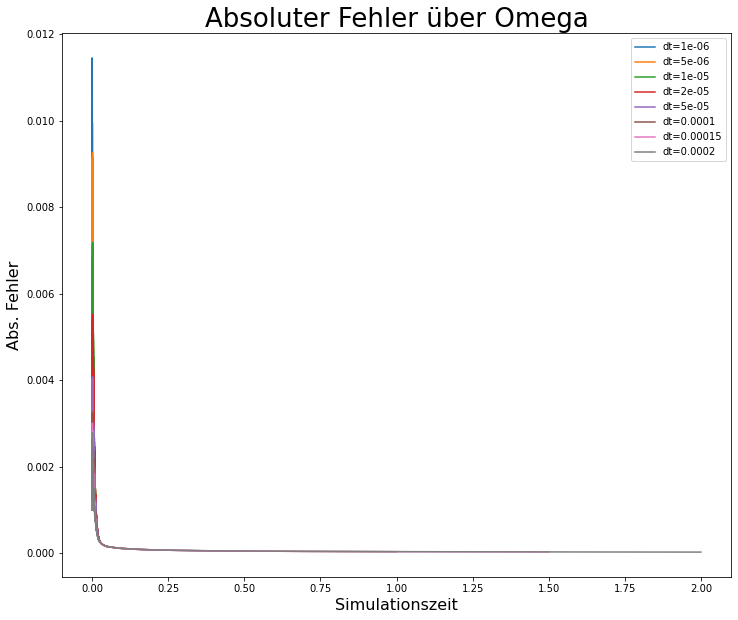

In [42]:
dtList = [0.000001,0.000005,0.000010,0.000020,0.000050,0.000100,0.000150,0.000200]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)

for t in dtList:
    file = "./omegaInvestigation/0.003_" + f'{t:f}' + "/history.txt"
    data = np.loadtxt(file,delimiter=",")
    xsi = dx / t
    sos = xsi / np.sqrt(3)
    omega = sos*sos*t / (nu + 0.5 * sos*sos*t) 
    ax.semilogy(data[:,0],data[:,1],label="dt=" + str(t))

ax.set_title("Absoluter Fehler über Omega",fontsize=26)
ax.set_xlabel('Simulationszeit', fontsize=16)
ax.set_ylabel('Abs. Fehler', fontsize=16)
plt.legend()
plt.savefig("AbsFehlerOmega.png")

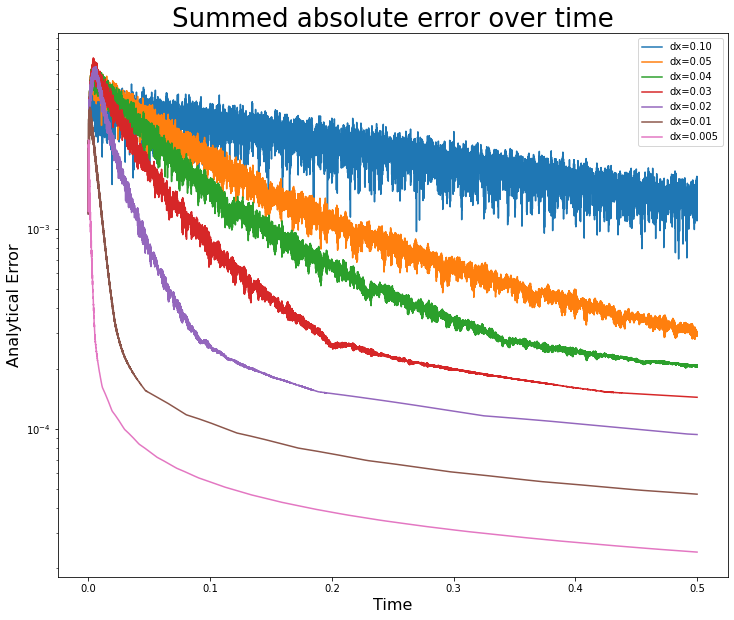

In [33]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)

file = "./dxInvestigation/0.10/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="dx=0.10")
file = "./dxInvestigation/0.05/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="dx=0.05")
file = "./dxInvestigation/0.04/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="dx=0.04")
file = "./dxInvestigation/0.03/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="dx=0.03")
file = "./dxInvestigation/0.02/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="dx=0.02")
file = "./dxInvestigation/0.01/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="dx=0.01")
file = "./dxInvestigation/0.005/history.txt"
data = np.loadtxt(file,delimiter=",")
ax.semilogy(data[1:,0],data[1:,1],label="dx=0.005")

ax.set_ylabel('Analytical Error', fontsize=16)
ax.set_xlabel('Time', fontsize=16)
ax.set_title('Summed absolute error over time', fontsize=26)
plt.legend(loc="upper right");
plt.savefig("AbsErrorOverTimeDepDx.png")

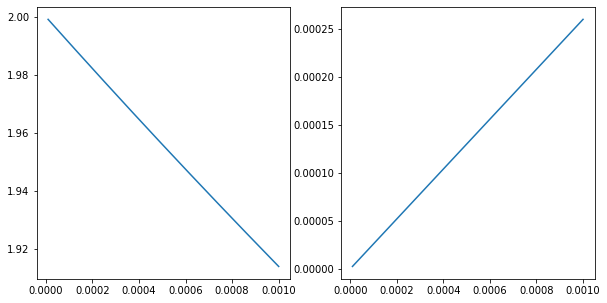

In [53]:
dx = 0.02
dt = np.linspace(1e-5,1e-3,1000)
xsi = dx / dt
sos = xsi / np.sqrt(3)
omega = sos * sos * dt / (nu + 0.5 * sos * sos * dt) 
ma = np.sqrt(3) * 0.003 / xsi
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(dt,omega)
ax[1].plot(dt,ma)

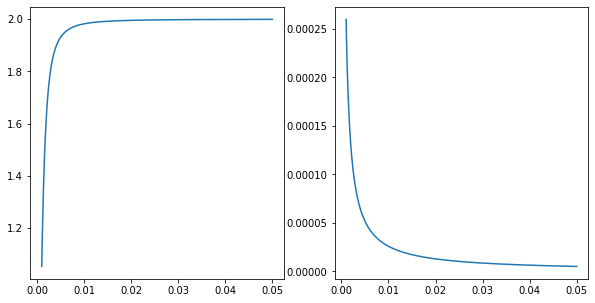

In [55]:
dx = np.linspace(0.05,0.001,1000)
dt = 5e-5
xsi = dx / dt
sos = xsi / np.sqrt(3)
omega = sos * sos * dt / (nu + 0.5 * sos * sos * dt) 
ma = np.sqrt(3) * 0.003 / xsi
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(dx,omega)
ax[1].plot(dx,ma)